In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from math import exp

In [2]:
data = pd.read_csv('data-logistic.csv', names=['y', 'x1', 'x2'])

In [3]:
data.head()

,y,x1,x2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [5]:
def grad(old_w, y_i, X_i):
    old_w = np.asarray(old_w)
    X_i = np.asarray(X_i)
    y_i = np.asarray(y_i)
    return k/l * np.dot(X_i.transpose(), (1 - 1/(1 + np.exp(- y_i * np.dot(X_i, old_w) )))*y_i) - k * C * old_w
    #return old_w + k/l * sum(y_i * X_i * (1 - 1/(1 + exp( - y_i * np.dot(old_w.reshape(len(X_i),), X_i))))) - k * C * old_w

In [42]:
y = np.asarray(data.y)
X = np.asarray(zip(data.x1, data.x2))
w = np.array([0, 0])

k = 0.5
C = 10
l = len(y)
new_w = w + grad(w, y, X)
e_s = np.linalg.norm(new_w-w)
while e_s > 0.00005:
    g = grad(w, y, X)
    new_w = w + g
    e_s = np.linalg.norm(new_w-w)
    w = new_w
    
my_y = 1/(1+np.exp(-np.dot(X, w)))
ra1 = round(roc_auc_score(y, my_y), 3)
C = 0
new_w = w + grad(w, y, X)
e_s = np.linalg.norm(new_w-w)
while e_s > 0.00005:
    g = grad(w, y, X)
    new_w = w + g
    e_s = np.linalg.norm(new_w-w)
    w = new_w
    
my_y = 1/(1+np.exp(-np.dot(X, w)))
ra = round(roc_auc_score(y, my_y), 3)

In [40]:

with open('ans3', 'w') as f:
    f.write(str(ra) + ' ' + str(ra1))

In [41]:
!less ans3

0.927 0.936


In [53]:
y = np.asarray(data.y)
X = np.asarray(zip(data.x1, data.x2))
w = np.array([0, 0])

k = 0.001
C = 10
l = len(y)
new_w = w + grad(w, y, X)
e_s = np.linalg.norm(new_w-w)
while e_s > 0.00005:
    g = grad(w, y, X)
    new_w = w + g
    e_s = np.linalg.norm(new_w-w)
    w = new_w
    
my_y = 1/(1+np.exp(-np.dot(X, w)))
ra1 = round(roc_auc_score(y, my_y), 3)
ra1

0.936

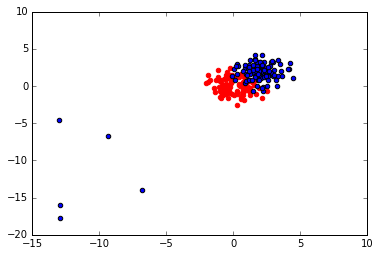

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
data0 = data[data.y == -1]
data1 = data[data.y == 1]
l0 = plt.scatter(data0.x1, data0.x2, color='red')
l1 = plt.scatter(data1.x1, data1.x2)

plt.show()